In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Embedding , Bidirectional , Dropout , LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

#load the dataset
vocab_size = 10000
max_length = 300 

(X_train , y_train) , (X_test , y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure the uniform input shape 
X_train = pad_sequences(X_train , maxlen = max_length , padding = 'post' , truncating = 'post')
X_test = pad_sequences(X_test , maxlen = max_length , padding = 'post' , truncating = 'post')

#Build the model 
model = Sequential([
    Embedding(  vocab_size , 128 , input_length=max_length),

    Bidirectional(LSTM(64 , return_sequences=False)) ,

    Dropout(0.3),
    Dense(64 , activation='relu'),
    Dropout(0.3),
    Dense(1 , activation='sigmoid')
])

#compile the model
model.compile(optimizer='adam' , 
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train , y_train , 
                   epochs = 5 ,
                   batch_size=32 ,
                   validation_split=0.2 ,
                   verbose = 1)

# Evaluate the model
test_loss , test_accuracy = model.evaluate(X_test , y_test , verbose = 0 )
print(f"test Acuuracy : {test_accuracy * 100:.2f}%")

# Make predictions on test data
predictions = model.predict(X_test)

# Convert probabilities to binary (0 or 1)
predicted_labels = (predictions > 0.5).astype("int32")

# Print first 10 predictions and actual labels
for i in range(10):
    print(f"Review #{i+1}:")
    print(f"Predicted Label: {'Positive' if predicted_labels[i][0] == 1 else 'Negative'}")
    print(f"Actual Label: {'Positive' if y_test[i] == 1 else 'Negative'}")
    print("-" * 40)


# Visualize training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Embedding , Bidirectional , Dropout , LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb 

In [4]:
#load the dataset 
vocab_size = 10000
max_length = 300 

(X_train , y_train) , (X_test , y_test) = imdb.load_data(num_words=vocab_size)

In [5]:
# Pad sequences to ensure the uniform input shape 
X_train = pad_sequences(X_train , maxlen=max_length , padding='post' ,truncating='post')
X_test = pad_sequences(X_test , maxlen=max_length,padding='post',truncating='post')

In [7]:
# Build the model
model = Sequential([
    Embedding(vocab_size , 128 , input_length=max_length),

    Bidirectional(LSTM(64 , return_sequences=False)),

    Dropout(0.3),
    Dense(64 , activation='relu'),
    Dropout(0.3),
    Dense(1,activation='sigmoid'),
])

c:\Users\adity\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
#Compile the model
model.compile(optimizer='adam' , 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
#train the model
history = model.fit(X_train , y_train , 
                    epochs = 5 ,
                    batch_size = 32 ,
                    validation_split=0.2 , 
                    verbose = 1)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 70ms/step - accuracy: 0.6112 - loss: 0.6349 - val_accuracy: 0.7628 - val_loss: 0.4943
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.8103 - loss: 0.4367 - val_accuracy: 0.8248 - val_loss: 0.4116
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.8901 - loss: 0.2872 - val_accuracy: 0.7842 - val_loss: 0.4607
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.9172 - loss: 0.2221 - val_accuracy: 0.8730 - val_loss: 0.3530
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.9490 - loss: 0.1499 - val_accuracy: 0.8630 - val_loss: 0.4437


In [11]:
# Evaluate the model 
test_loss , test_accuracy = model.evaluate(X_test , y_test , verbose=0)
print(f"Accuracy : {test_accuracy*100:.2f}%")

Accuracy : 84.24%


In [12]:
#make predictions on test data 
predictions = model.predict(X_test)

#Convert probabilities to binary (0 or 1)
predicted_labels = (predictions > 0.5).astype("int32")

for i in range(10) : 
    print(f"Revivew #{i+1}:")
    print(f"Predicted Label: {'Positive' if predicted_labels[i][0] == 1 else 'Negative'}")
    print(f"Acctual Label : {'Positive' if y_test[i] == 1 else 'Negative'}")
    print("-"*40)

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step
Revivew #1:
Predicted Label: Negative
Acctual Label : Negative
----------------------------------------
Revivew #2:
Predicted Label: Positive
Acctual Label : Positive
----------------------------------------
Revivew #3:
Predicted Label: Positive
Acctual Label : Positive
----------------------------------------
Revivew #4:
Predicted Label: Negative
Acctual Label : Negative
----------------------------------------
Revivew #5:
Predicted Label: Positive
Acctual Label : Positive
----------------------------------------
Revivew #6:
Predicted Label: Negative
Acctual Label : Positive
----------------------------------------
Revivew #7:
Predicted Label: Positive
Acctual Label : Positive
----------------------------------------
Revivew #8:
Predicted Label: Negative
Acctual Label : Negative
----------------------------------------
Revivew #9:
Predicted Label: Positive
Acctual Label : Negative
----------------------------------------
Revivew #10:
Predicte

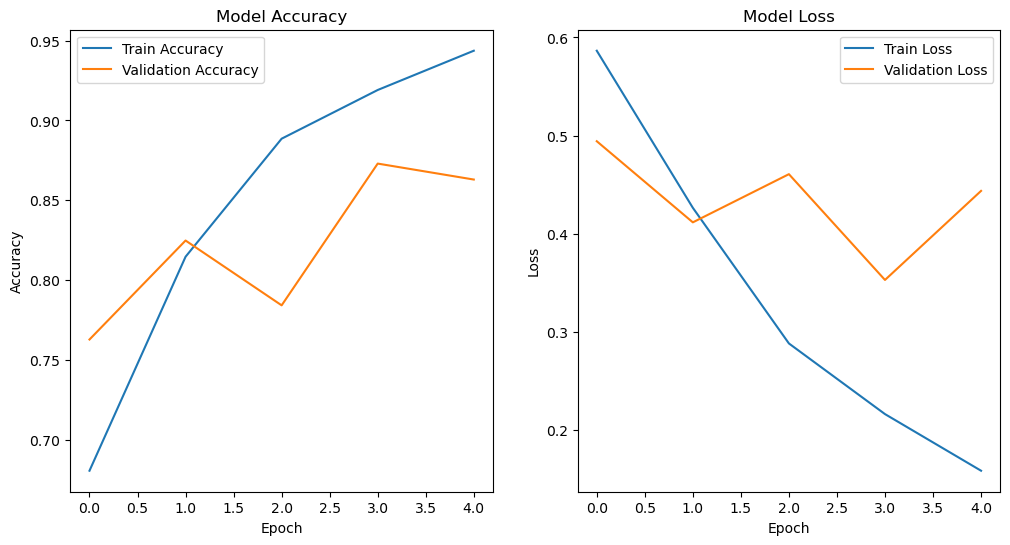

In [13]:

# Visualize training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()